# 1. Abstract

I’m always curious if we can find some differences in terms of attributes between commercially successful movies and good-rated movies. I find this set of top 1000 movies grouped by IMDb: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc, and I wanted to know if I could gain some insights into the problem using this dataset as my sample. I first started by acquiring the basic movie info by scraping it off of IMDb’s page, passing it on to OMDB web API, and storing more detailed information. After that, I perform an EDA on the data I just got and added some new features like language counts and dummy variables for movie genres. Then I redo my EDA and create an indicator on movies to indicate whether they are the top 250 rated movies or the top 250 box office movies in the dataset. Finally, I performed some investigative analysis on my new dataset with the new indicator, including cluster analysis and building predictive models. My major outcomes are (applicable to the sample I chose, and may apply to other samples under a similar context):

1. It seems recent movies seem to be a little more successful than older movies commercially.

2. Big IPs movies are more likely to be both commercially successful and get good ratings.

3. Action, adventure, and drama are the three genres that could help classify if a movie is likely to be more commercially successful.

# 2. Introduction

My project focuses on the top 1000 movies picked by IMDb: https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc
 
My research questions are:
What are some of the similarities and differences between ‘top 250 user-reviewed movies’ and ‘top 250 movies by us box office?
What are some common characteristics of a movie that’s both well-received and commercially successful?
 
My motives for this project are mostly out of personal interest, but I think it could also reveal some useful business insights on what more likely leads to a top box office movie
 
Before I answer my research questions, I’ll first have to acquire desired data. I extracted basic movie information from the above IMDb page and pass them to the OMDB web API and stored more detailed movie information.
 
Then after loading the dataset and performing EDA, I’ll perform some feature engineering that includes getting dummy variables for movie genres and language count, to make my variables of interest easier to work with and add some of my variables of interest.
 
Then with the new prepped dataset, I’ll perform EDA again and then head into the investigative analysis. I’ll first create an indicator that differentiates the top 250 user-reviewed movies and the top 250 movies by the top box office. Then I’ll draw graphs on some variables that I have assumptions about in the difference of distribution among the two sets, after which I’ll get some answers to my assumptions and have a general idea of the two sets.
 
Then I’ll perform a cluster analysis to try to find characteristics of movies that are both commercially successful and well-rated.
 
Finally, I’ll build predictive models that help me classify movies into top_rated and models that help me classify movies into top_box office. The insights I get from the predictive models could like confirm some of the insights we derived from the graphs drawn earlier and possibly provide more to answer my research question.

# 3. Research Approach

Below is a summary of my research approaches:

1. For Data Acquisition: I scraped the movie names and years off of IMDb’s page, and pass them as parameters to the OMDB web API, along with a for loop that will go through all 1000 movies. After that, I store my information using ‘_tocsv’, and uploaded it to my GitHub repository for later access.


2. For EDA: I used matplotlib and seaborn as my plotting packages. I first converted some data types of the attributes so that I can graph and perform analysis on them. Then I plotted each numeric variable of my interest with a histogram and a boxplot side by side to clearly see their distribution. After that, I plotted some graphs containing both ratings and box office and some other variables to see if there was some potential relationship.


3. For Data Preparation: I created a new variable called language count by counting the commas that separate each language and adding one for the last language that does not have a comma following it. After that, I converted rated systems to numeric codes for ease of study. Then I used ‘get_dummies’ to create dummy variables for genres. I then incorporated an inflation dataset into the project since the box office not adjusted for inflation will negatively affect my study going forward. Finally, I check for null values and dropped rows with missing data due to them being too foreign (relative to the US market) or too old.


4. For Post Data Preparation EDA: for the most part I did the same thing with my new prepped dataset. I then incorporated the new graphs for the new variables: language counts and dummy variables for genres.


5. For Investigative Analysis and Result: I first created two new indicators called ‘top_rated’ and ‘top_boxoffice’ to mark if they are the top 250 rated movies or the top 250 box office movies. After that, I performed some analysis on some attributes that I’m interested in using the indicator that I just created: genre, rated, runtime, year, imdbVotes, and language counts. 

For genre I first selected all the genre dummies and the two indicators I created and melt them into a new data frame, then I melted the new data frame to get ‘top_rated’ and ‘top_boxoffice’ as our variables that I later used to pass on as hue. I then created a distribution plot using the newest data frame.

For rated and language I created bar plots that stack on top of each so that we can see clearly which bar top_rated has a larger value, and on which bar top_boxoffice has a larger value.

For other numeric attributes, I created similar KDE plots with two vertical lines indicating their respective means. This way not only its easier to compare their density distribution but it's also easy to compare their means visually.

Then I moved on to my cluster analysis where I used k-means cluster analysis in the hope to find some revealing clusters. I also incorporated ‘silhouette_score’ from scikit learn to help me evaluate my cluster analysis. I made use of a radar chart tutorial that I found online to help me visualize my cluster analysis result: https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart.

Finally, for the last part of the investigative analysis, I built predictive models to predict whether a movie in our dataset is ‘top_rated’ or ‘top_boxoffice’. I did this using selectKBest where I defined a function to go through all possible k values and find the most optimal number of attributes and its corresponding model, and then I could derive the optimal model's attributes and get an insight on what’s most important in determining if a movie is considered ’top_rated’ or ‘top_boxoffice’.

# (3.5). Data Acquisition

(Don't know where to put this so I'm putting it here)

In [ ]:
#Import package
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup

Scraping from imdb for movie names and years

In [ ]:
# Create an empty movie list to store information scraped from online
movie_list = []
# Write a for lop to go through all pages of imdb Top 1000
for page in range(20):
    url = f'https://www.imdb.com/search/title/?groups=top_1000&start={page*5}1&sort=user_rating,desc'
    url_text = requests.get(url).text
    url_soup = BeautifulSoup(url_text, 'html.parser') 
    # Create lists to store names and years after getting them
    movie_names = [name.string.strip() for name in url_soup.select('.lister-item-header>a')]
    movie_years = [year.string.strip().split('(')[-1][:-1] for year in url_soup.select('.lister-item-year')]
    # Zip our new list into our defined movie list
    movie_list += [ {"name":val[0], "year": val[1]} for val in zip(movie_names, movie_years)]

In [ ]:
#Check if got all movies and show movie lis
print(len(movie_list))
movie_list

1000


[{'name': 'The Shawshank Redemption', 'year': '1994'},
 {'name': 'The Godfather', 'year': '1972'},
 {'name': 'The Dark Knight', 'year': '2008'},
 {'name': 'The Lord of the Rings: The Return of the King', 'year': '2003'},
 {'name': "Schindler's List", 'year': '1993'},
 {'name': 'The Godfather Part II', 'year': '1974'},
 {'name': '12 Angry Men', 'year': '1957'},
 {'name': '777 Charlie', 'year': '2022'},
 {'name': 'Jai Bhim', 'year': '2021'},
 {'name': 'Pulp Fiction', 'year': '1994'},
 {'name': 'Rocketry: The Nambi Effect', 'year': '2022'},
 {'name': 'Inception', 'year': '2010'},
 {'name': 'The Lord of the Rings: The Two Towers', 'year': '2002'},
 {'name': 'Fight Club', 'year': '1999'},
 {'name': 'The Lord of the Rings: The Fellowship of the Ring', 'year': '2001'},
 {'name': 'Forrest Gump', 'year': '1994'},
 {'name': 'The Good, the Bad and the Ugly', 'year': '1966'},
 {'name': 'Soorarai Pottru', 'year': '2020'},
 {'name': 'The Matrix', 'year': '1999'},
 {'name': 'Goodfellas', 'year': '199

Passing information to omdb webapi for detailed information

In [ ]:
# Create a new list called movie info to store all information get back from webapi
movieInfo = []
# Write a for loop to loop through all movies we just saved
for index in range(len(movie_list)):
    movie = movie_list[index]
    # Store the returned detailed information as result
    result = json.loads(requests.get('http://www.omdbapi.com/', params={
        'apikey': '6033f0f2',
        't': movie['name'],
        'y': movie['year']
    }).content)
    # save all results into movieInfo
    movieInfo += [result]
# Write movieInfo into a dataframe
data = pd.DataFrame(movieInfo)
data

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,...,9.3,"2,662,343",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True,NaN
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,...,9.2,"1,847,150",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True,NaN
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,...,9.0,"2,638,780",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True,NaN
3,The Lord of the Rings: The Return of the King,2003,PG-13,17 Dec 2003,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Viggo Mortensen, Ian McKellen",Gandalf and Aragorn lead the World of Men agai...,...,9.0,"1,837,587",tt0167260,movie,25 May 2004,"$378,251,207",N/A,N/A,True,NaN
4,Schindler's List,1993,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally, Steven Zaillian","Liam Neeson, Ralph Fiennes, Ben Kingsley","In German-occupied Poland during World War II,...",...,9.0,"1,349,692",tt0108052,movie,12 Feb 2008,"$96,898,818",N/A,N/A,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954,Passed,15 Oct 1954,113 min,"Comedy, Drama, Romance",Billy Wilder,"Billy Wilder, Samuel A. Taylor, Ernest Lehman","Humphrey Bogart, Audrey Hepburn, William Holden",A playboy becomes interested in the daughter o...,...,7.6,"65,766",tt0047437,movie,10 Apr 2001,N/A,N/A,N/A,True,NaN
996,From Here to Eternity,1953,Passed,28 Aug 1953,118 min,"Drama, Romance, War",Fred Zinnemann,"Daniel Taradash, James Jones","Burt Lancaster, Montgomery Clift, Deborah Kerr","At a U.S. Army base in 1941 Hawaii, a private ...",...,7.6,"47,571",tt0045793,movie,04 Mar 2003,"$36,416",N/A,N/A,True,NaN
997,Snow White and the Seven Dwarfs,1937,Approved,04 Feb 1938,83 min,"Animation, Adventure, Family","William Cottrell, David Hand, Wilfred Jackson","Jacob Grimm, Wilhelm Grimm, Ted Sears","Adriana Caselotti, Harry Stockwell, Lucille La...",Exiled into the dangerous forest by her wicked...,...,7.6,"200,347",tt0029583,movie,27 Mar 2007,"$184,925,486",N/A,N/A,True,NaN
998,The 39 Steps,1935,Approved,31 Jul 1935,86 min,"Crime, Mystery, Thriller",Alfred Hitchcock,"John Buchan, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Lucie Mannheim",A man in London tries to help a counter-espion...,...,7.6,"57,634",tt0026029,movie,02 Nov 1999,N/A,N/A,N/A,True,NaN


Storing our file

In [ ]:
# Naming the file AllInfo
file_name = 'AllInfo.csv'
  
# Saving the excel
data.to_csv(file_name)

# 4. Exploratory Data Analysis

## Preparation

In [ ]:
# Import packages first
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import math
# Set seaborn theme to default
sns.set_theme()
# Set max display columns to none to be able to see all column information
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

In [ ]:
# Read from original file
df = pd.read_csv('https://raw.githubusercontent.com/fbhsaid/DAV-5400/main/AllInfo.csv')
df

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,0,The Shawshank Redemption,1994.0,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",81.0,9.3,"2,662,343",tt0111161,movie,21 Dec 1999,"$28,767,189",NaN,NaN,True,NaN
1,1,The Godfather,1972.0,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",United States,Won 3 Oscars. 32 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100.0,9.2,"1,847,150",tt0068646,movie,11 May 2004,"$136,381,073",NaN,NaN,True,NaN
2,2,The Dark Knight,2008.0,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 160 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,9.0,"2,638,780",tt0468569,movie,09 Dec 2008,"$534,987,076",NaN,NaN,True,NaN
3,3,The Lord of the Rings: The Return of the King,2003.0,PG-13,17 Dec 2003,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Viggo Mortensen, Ian McKellen",Gandalf and Aragorn lead the World of Men agai...,"English, Quenya, Old English, Sindarin","New Zealand, United States",Won 11 Oscars. 209 wins & 124 nominations total,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,9.0,"1,837,587",tt0167260,movie,25 May 2004,"$378,251,207",NaN,NaN,True,NaN
4,4,Schindler's List,1993.0,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally, Steven Zaillian","Liam Neeson, Ralph Fiennes, Ben Kingsley","In German-occupied Poland during World War II,...","English, Hebrew, German, Polish, Latin",United States,Won 7 Oscars. 91 wins & 49 nominations total,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,9.0,"1,349,692",tt0108052,movie,12 Feb 2008,"$96,898,818",NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Sabrina,1954.0,Passed,15 Oct 1954,113 min,"Comedy, Drama, Romance",Billy Wilder,"Billy Wilder, Samuel A. Taylor, Ernest Lehman","Humphrey Bogart, Audrey Hepburn, William Holden",A playboy becomes interested in the daughter o...,"English, French",United States,Won 1 Oscar. 7 wins & 8 nominations total,https://m.media-amazon.com/images/M/MV5BYmFlNT...,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.6,"65,766",tt0047437,movie,10 Apr 2001,NaN,NaN,NaN,True,NaN
996,996,From Here to Eternity,1953.0,Passed,28 Aug 1953,118 min,"Drama, Romance, War",Fred Zinnemann,"Daniel Taradash, James Jones","Burt Lancaster, Montgomery Clift, Deborah Kerr","At a U.S. Army base in 1941 Hawaii, a private ...",English,United States,Won 8 Oscars. 25 wins & 9 nominations total,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,"[{'Source': 'Internet Movie Database', 'Value'...",85.0,7.6,"47,409",tt0045793,movie,04 Mar 2003,"$36,416",NaN,NaN,True,NaN
997,997,Snow White and the Seven Dwarfs,1937.0,Approved,04 Feb 1938,83 min,"Animation, Adventure, Family","William Cottrell, David Hand, Wilfred Jackson","Jacob Grimm, Wilhelm Grimm, Ted Sears","A

In [ ]:
# Drop irrelevant columns and not interested variables
df.drop(['Unnamed: 0', 'Poster', 'imdbID', 'Type', 'DVD', 'Production', 'Website', 'Response', 'Error', 'Director', 'Writer', 'Actors', 'Plot'], axis=1, inplace=True)
# Check for duplicated rows
df.duplicated().sum()

0

## Type fixes and distributions

### Year

Text(0.5, 1.0, 'Boxplot for Year')

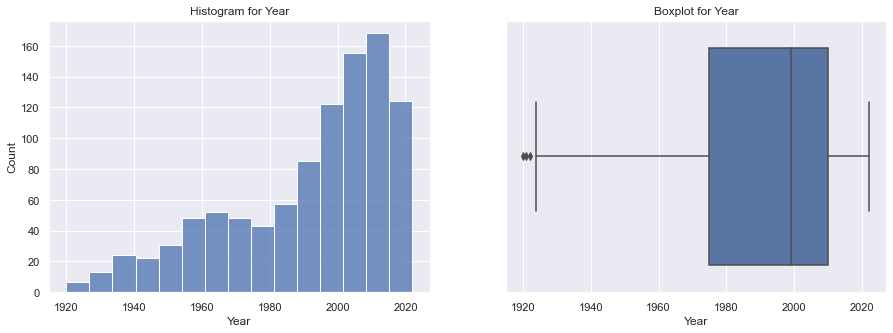

In [ ]:
#Show histogram and boxplot for Year
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='Year').set_title('Histogram for Year')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='Year').set_title('Boxplot for Year')

We can see from the histogram that most of the movies in our dataset were produced between 1990 to 2020. The boxplot tells us that the median for movie years is 1999, and movies from the year 1975 to the year 2010 made up the middle 50% of the dataset.

### BoxOffice

In [ ]:
#Take off dollar sign and comma and change type to float
df['BoxOffice'] = df['BoxOffice'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-5-626427cfe6d3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['BoxOffice'] = df['BoxOffice'].str.replace(',', '').str.replace('$', '').astype(float)


Text(0.5, 1.0, 'Boxplot for BoxOffice')

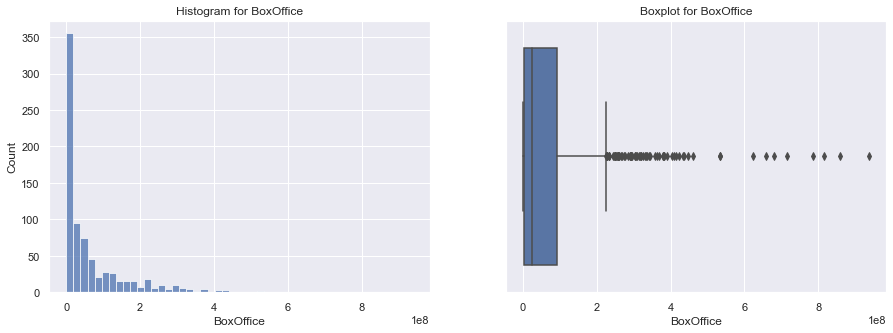

In [ ]:
#Show histogram and boxplot for BoxOffice
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='BoxOffice').set_title('Histogram for BoxOffice')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='BoxOffice').set_title('Boxplot for BoxOffice')

We can see from the histogram that the majority of the movies in our dataset generated a box office of fewer than 200 million dollars. The boxplot confirmed this and tells us that the middle 50% of the movie generates from 10 million to 100 million dollars, and the median for the box office is 20 million dollars.

### imdbRating

In [ ]:
#Change type to float first
df['imdbRating'] = df['imdbRating'].astype(float)

Text(0.5, 1.0, 'Boxplot for imdbRating')

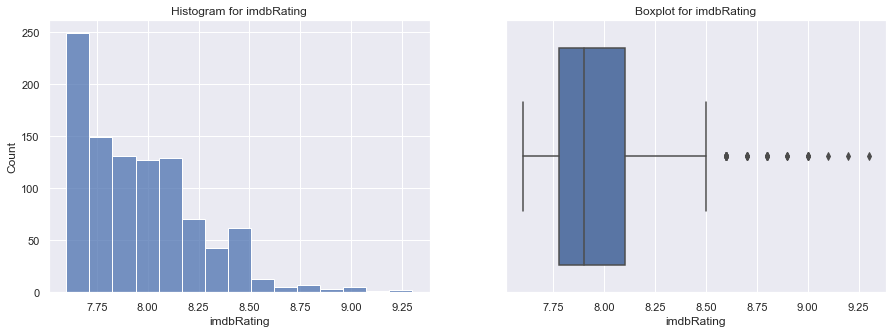

In [ ]:
#Show histogram and boxplot for BoxOffice
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='imdbRating', bins = 15).set_title('Histogram for imdbRating')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='imdbRating').set_title('Boxplot for imdbRating')

We can see from the histogram most of our movies' IMDb rating ranges from 7.625 to 8.125, and the boxplot tells us that the middle 50% of movies have an IMDb rating that ranges from  7.80 to 8.13, and the median for IMDb rating is 7.90.

### imdbVotes

In [ ]:
#Take off comma and change type to float first
df['imdbVotes'] = df['imdbVotes'].str.replace(',', '').astype(float)

Text(0.5, 1.0, 'Boxplot for imdbVotes')

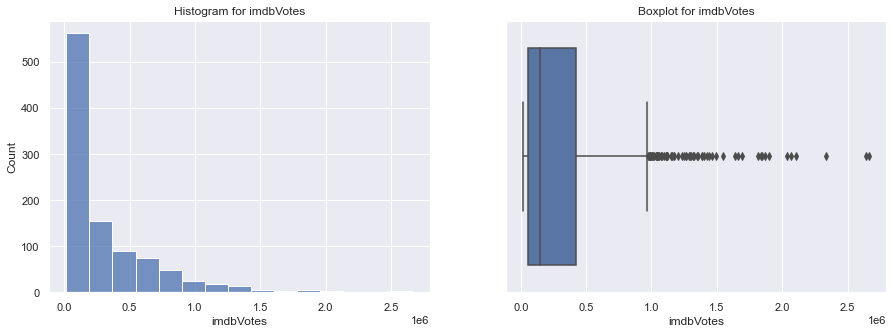

In [ ]:
#Show histogram and boxplot for imdbVotes
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='imdbVotes', bins = 15).set_title('Histogram for imdbVotes')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='imdbVotes').set_title('Boxplot for imdbVotes')

From the histogram, we can see that most of our movies have imdbVotes of less than 1.1 million, and the boxplot tells us that the middle 50% of the movies have an imdbVotes from 0.05 million to 0.4 million, and the median for imdbVotes is 0.18 million.

### Runtime

In [ ]:
# Take off min in Runtime and change type to float
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(float)

Text(0.5, 1.0, 'Boxplot for Runtime')

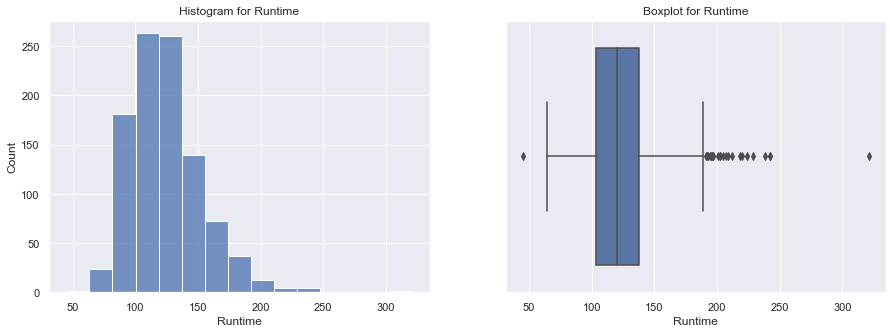

In [ ]:
#Show histogram and boxplot for Runtime
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='Runtime', bins = 15).set_title('Histogram for Runtime')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='Runtime').set_title('Boxplot for Runtime')

From the histogram, we can see that most of our movies have a runtime ranging from 80 to 155 minutes, and the boxplot tells us that the middle 50% of the movies have a runtime from 100 to 140 minutes, and the median runtime is 120 minutes.

### Extract Rotten Tomatoes (from Ratings)

I found the rotten tomatoes rating hidden inside the ratings value, so I defined a findTomato function to find it

In [ ]:
# First replace '' in ratings to "" so that it could be load in json later
df['Ratings'] = df['Ratings'].str.replace("'", '"')
# Define function with row as input
def findTomato(row):
    # If no value in ratings or null, return nan
    if row.Ratings is np.nan or not row.Ratings: 
        return np.nan
    # Otherwise use load as json
    ratings = json.loads(row.Ratings)
    # Since the value is in 'source value' format, we locate source as rotten tomatoes and return its value in integer type
    for rating in ratings: 
        if rating['Source'] == 'Rotten Tomatoes':
            return int(rating['Value'][:-1])
    # If no source of rotten tomatoes is found in row.Ratings, return nan
    return np.nan

# Apply findTomato to our dataframe and save it as a new column called 'RottenTomatoes'
df['RottenTomatoes'] = df.apply(findTomato, axis=1)
df['RottenTomatoes'].describe()

count    950.000000
mean      89.056842
std       10.267596
min       27.000000
25%       85.000000
50%       92.000000
75%       96.000000
max      100.000000
Name: RottenTomatoes, dtype: float64

Text(0.5, 1.0, 'Boxplot for RottenTomatoes')

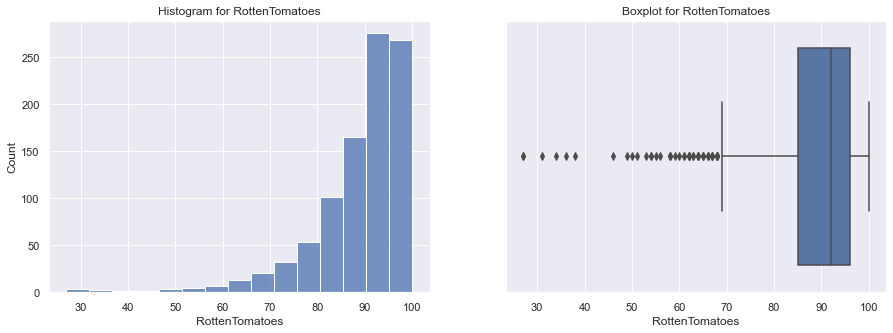

In [ ]:
#Show histogram and boxplot for Runtime
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='RottenTomatoes', bins = 15).set_title('Histogram for RottenTomatoes')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='RottenTomatoes').set_title('Boxplot for RottenTomatoes')

From the histogram, we can see that most of the movies in our dataset have a RottenTomatoes score of 81 to 100, and the boxplot tells us that the middle 50% of the movies in our dataset have a RottenTomatoes score from 84 to 96, and the median for RottenTomatoes is 92.

## Metascore

In [ ]:
#Change type to float first
df['Metascore'] = df['Metascore'].astype(float)

Text(0.5, 1.0, 'Boxplot for Metascore')

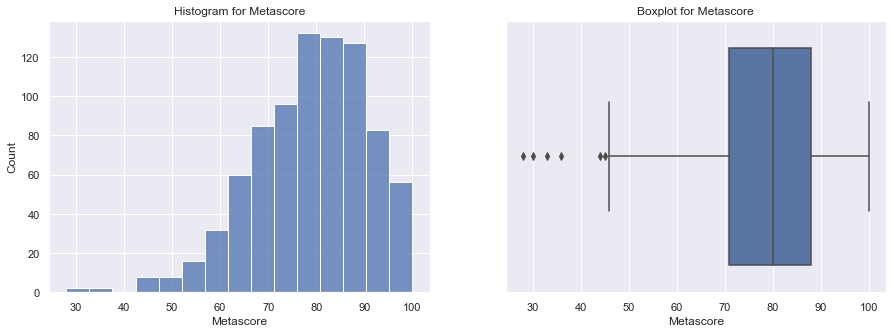

In [ ]:
#Show histogram and boxplot for Metascore
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x='Metascore', bins = 15).set_title('Histogram for Metascore')
plt.subplot(1, 2, 2)
sns.boxplot(df, x='Metascore').set_title('Boxplot for Metascore')

From the histogram, we can see that most of the movies in our dataset have a Metascore that ranges from 67 to 95, and the boxplot tells us that the middle 50% of the movies has a Metascore of 70 to 88, and the median for Metascore is 80.

## Rated

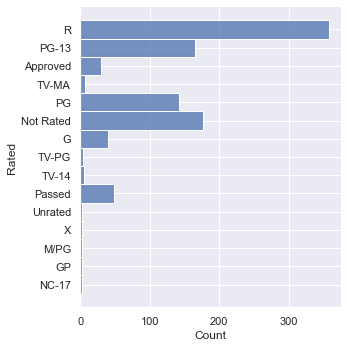

In [ ]:
# Show distribution plot for 'Rated'
sns.displot(df, y='Rated')

We can see from the distribution plot that 'R' is the most frequently seen rating among our movies in the dataset, followed by 'Not Rated', 'PG-13', and 'PG'. 'Approved', 'G', and 'Passed' are also seen in some movies, and the rest of the ratings are only seen in a few movies each.

## Relations of Ratings and Boxoffice and Other Variables

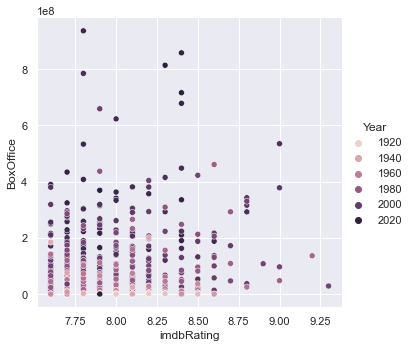

In [ ]:
# Show relationship plot between boxoffice, imdbrating, and year
sns.relplot(data=df, hue='Year', x='imdbRating', y='BoxOffice')

It's quite clear that almost all movies that have a box office of over 600 million dollars are made after 2000, I will introduce a new dataset that contains inflation data to help me combat the inflation impact.

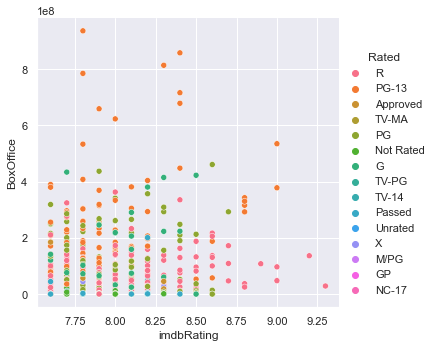

In [ ]:
# Show relationship plot between boxoffice, imdbrating, and rated
sns.relplot(data=df, hue='Rated', y='BoxOffice', x='imdbRating')

Aside from the highest box office movies all being PG-13 rated, it's hard to draw any valid conclusions from this graph since there are too many ratings and the colors get too close, I will look into ways to simplify this in my data preparation stage.

### Check for null values

In [ ]:
df.isnull().sum()

Title               1
Year                1
Rated              16
Released            1
Runtime             1
Genre               1
Language            1
Country            20
Awards             14
Ratings             1
Metascore         163
imdbRating          4
imdbVotes           1
BoxOffice         215
RottenTomatoes     50
dtype: int64

BoxOffice, RottenTomatoes, and Metascore are among those with the most missing values, I'll look into this in my data preparation stage.

### EDA Conclusions

So to conclude, through our EDA we get a basic understanding of the distributions of our numeric attributes, found out that the rated system right now is too sparse and complicated, and that the impact of inflation must be adjusted. In the data preparation stage, I'll try to stress these issues.

# 5. Data Preparation

## Feature Engineering

### Language Count

I feel like having a language count on how many kinds of languages the movie was launched in would be helpful since more the language at launch usually means a bigger production, which could potentially lead to higher box office.

In [ ]:
# Create a new variable called LanguageCount
df['LanguageCount'] = df['Language'].str.count(',') + 1
df[['LanguageCount']]

,LanguageCount
0,1.0
1,3.0
2,2.0
3,4.0
4,5.0
...,...
995,2.0
996,1.0
997,1.0
998,1.0


### Converting Rated

As we see in the previous EDA, there were too many classifications in the rated system that it was impossible to draw any valid conclusions from the graph, and after a little research, I realized many of them are very close by definition and I could group them using a numeric code system. Below is how I transformed it.

In [ ]:
# First find all unique values of movie ratings in our dataframe and save it to a new one
rated_unique = pd.DataFrame([i for i in df['Rated'].dropna().unique()], columns=['name'])
rated_unique.set_index('name', inplace=True)
# Based on the definition given by officials, manually label them in order of parental guidance, except for not rated/unrated and passed/approved
rated_unique['code'] = [3, 2, 6, 3, 1, 5, 0, 1, 2, 6, 5, 4, 1, 1, 4]
rated_unique.sort_values('code', inplace=True)
rated_unique['comment'] = ['General Audiences, All Ages Admitted', 'Parental Guidance Suggested', 'Parental Guidance Suggested', 'Parental Guidance Suggested', 'Parental Guidance is Advised',
                           'Parents Strongly Cautioned', 'Parents Strongly Cautioned', 'Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian', 'Mature Audience Only, may be unsuitable for children under 17', 'Former NC-17', 'No One 17 and Under Admitted', 'Not Sent for Review', 'Not Sent for Review', 'No Other Ratings at the Time', 'No Other Ratings at the Time']
rated_unique

,code,comment
name,,
G,0,"General Audiences, All Ages Admitted"
PG,1,Parental Guidance Suggested
TV-PG,1,Parental Guidance Suggested
M/PG,1,Parental Guidance Suggested
GP,1,Parental Guidance is Advised
PG-13,2,Parents Strongly Cautioned
TV-14,2,Parents Strongly Cautioned
R,3,"Restricted, Children Under 17 Require Accompan..."
TV-MA,3,"Mature Audience Only, may be unsuitable for ch..."


In [ ]:
# Create a new column called Rated_index and store all the indexes after applying a lambda function
df['Rated_index'] = df.apply(lambda row: rated_unique.loc[row.Rated]['code'] if row.notna().Rated else np.nan, axis=1)
df[['Title', 'Year', 'Rated', 'Rated_index']]

,Title,Year,Rated,Rated_index
0,The Shawshank Redemption,1994.0,R,3.0
1,The Godfather,1972.0,R,3.0
2,The Dark Knight,2008.0,PG-13,2.0
3,The Lord of the Rings: The Return of the King,2003.0,PG-13,2.0
4,Schindler's List,1993.0,R,3.0
...,...,...,...,...
995,Sabrina,1954.0,Passed,6.0
996,From Here to Eternity,1953.0,Passed,6.0
997,Snow White and the Seven Dwarfs,1937.0,Approved,6.0
998,The 39 Steps,1935.0,Approved,6.0


### Genre Dummies

I think getting dummy variables for movie genres would be very good for me doing genre analysis moving forward, so I used get_dummies here.

In [ ]:
# Use get_dummies to get genre dummies
genre_dummies = df['Genre'].str.get_dummies(sep=', ', )
# Join to dataset
df = df.join(genre_dummies)
df

,Title,Year,Rated,Released,Runtime,Genre,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994.0,R,14 Oct 1994,142.0,Drama,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,"[{""Source"": ""Internet Movie Database"", ""Value""...",81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972.0,R,24 Mar 1972,175.0,"Crime, Drama","English, Italian, Latin",United States,Won 3 Oscars. 32 wins & 30 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008.0,PG-13,18 Jul 2008,152.0,"Action, Crime, Drama","English, Mandarin","United States, United Kingdom",Won 2 Oscars. 160 wins & 163 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Lord of the Rings: The Return of the King,2003.0,PG-13,17 Dec 2003,201.0,"Action, Adventure, Drama","English, Quenya, Old English, Sindarin","New Zealand, United States",Won 11 Oscars. 209 wins & 124 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Schindler's List,1993.0,R,04 Feb 1994,195.0,"Biography, Drama, History","English, Hebrew, German, Polish, Latin",United States,Won 7 Oscars. 91 wins & 49 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954.0,Passed,15 Oct 1954,113.0,"Comedy, Drama, Romance","English, French",United States,Won 1 Oscar. 7 wins & 8 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",72.0,7.6,65766.0,NaN,93.0,2.0,6.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
996,From Here to Eternity,1953.0,Passed,28 Aug 1953,118.0,"Drama, Romance, War",English,United States,Won 8 Oscars. 25 wins & 9 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",85.0,7.6,47409.0,36416.0,88.0,1.0,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
997,Snow White and the Seven Dwarfs,1937.0,Approved,04 Feb 1938,83.0,"Animation, Adventure, Family",English,United States,Nominated for 1 Oscar. 11 wins & 6 nominations...,"[{""Source"": ""Internet Movie Database"", ""Value""...",95.0,7.6,200347.0,184925486.0,NaN,1.0,6.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,The 39 Steps,1935.0,Approved,31 Jul 1935,86.0,"Crime, Mystery, Thriller",English,United Kingdom,1 win & 1 nomination,"[{""Source"": ""Internet Movie Database"", ""Value""...",93.0,7.6,57634.0,NaN,96.0,1.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


## Combating Inflation

Since the box office data we got from OMDB is not adjusted for inflation, it's going to negatively affect our study going forward, favoring all the more recent movies instead of the old ones. So I downloaded inflation rate and amount data from: https://www.officialdata.org/us/inflation/1900?amount=1 and incorporated it into my dataset. This dataset contains the inflation rate and amount of 1 dollar since 1900.

In [ ]:
# Load inflation data from Github
inflation = pd.read_csv('https://raw.githubusercontent.com/fbhsaid/DAV-5400/main/inflation_data%20(1).csv')
inflation = inflation.rename(columns={"year": "Year", "amount": "Amount", "inflation rate": 'InflationRate'})
# Change types first
inflation.Year = inflation.Year.astype(float)
inflation.Amount = inflation.Amount.astype(float)
# Get 2022 inflation amount to use for lambda function later to convert every boxoffice value to 2022 US dollar value
current_inflation_amount = inflation[inflation.Year == 2022].iloc[0]['Amount']
# Define lambda function and apply to our dataset so that we have a new InlatedBoxOffice column that records adjusted boxoffice for every movie.
df['InflatedBoxOffice'] = df.apply(lambda row: row['BoxOffice'] * current_inflation_amount / inflation[inflation.Year == row.Year].iloc[0]['Amount'] if row.notna().Year else np.nan, axis=1)
df

,Title,Year,Rated,Released,Runtime,Genre,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,InflatedBoxOffice
0,The Shawshank Redemption,1994.0,R,14 Oct 1994,142.0,Drama,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,"[{""Source"": ""Internet Movie Database"", ""Value""...",81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.786054e+07
1,The Godfather,1972.0,R,24 Mar 1972,175.0,"Crime, Drama","English, Italian, Latin",United States,Won 3 Oscars. 32 wins & 30 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.716467e+08
2,The Dark Knight,2008.0,PG-13,18 Jul 2008,152.0,"Action, Crime, Drama","English, Mandarin","United States, United Kingdom",Won 2 Oscars. 160 wins & 163 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.405908e+08
3,The Lord of the Rings: The Return of the King,2003.0,PG-13,17 Dec 2003,201.0,"Action, Adventure, Drama","English, Quenya, Old English, Sindarin","New Zealand, United States",Won 11 Oscars. 209 wins & 124 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.128015e+08
4,Schindler's List,1993.0,R,04 Feb 1994,195.0,"Biography, Drama, History","English, Hebrew, German, Polish, Latin",United States,Won 7 Oscars. 91 wins & 49 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.998820e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954.0,Passed,15 Oct 1954,113.0,"Comedy, Drama, Romance","English, French",United States,Won 1 Oscar. 7 wins & 8 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",72.0,7.6,65766.0,NaN,93.0,2.0,6.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
996,From Here to Eternity,1953.0,Passed,28 Aug 1953,118.0,"Drama, Romance, War",English,United States,Won 8 Oscars. 25 wins & 9 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",85.0,7.6,47409.0,36416.0,88.0,1.0,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4.063018e+05
997,Snow White and the Seven Dwarfs,1937.0,Approved,04 Feb 1938,83.0,"Animation, Adventure, Family",English,United States,Nominated for 1 Oscar. 11 wins & 6 nominations...,"[{""Source"": ""Internet Movie Database"", ""Value""...",95.0,7.6,200347.0,184925486.0,NaN,1.0,6.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.836933e+09
998,The 39 Steps,1935.0,Approved,31 Jul 1935,86.0,"Crime, Mystery, Thriller",English,United Kingdom,1 win & 1 nomination,"[{""Source"": ""Internet Movie Database"", ""Value""...",93.0,7.6,57634.0,NaN,96.0,1.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,NaN


In [ ]:
inflation

,Year,Amount,InflationRate
0,1900.0,1.00,0.01
1,1901.0,1.01,0.01
2,1902.0,1.02,0.01
3,1903.0,1.05,0.02
4,1904.0,1.06,0.01
...,...,...,...
118,2018.0,29.91,0.02
119,2019.0,30.44,0.02
120,2020.0,30.81,0.01
121,2021.0,32.26,0.05


In [ ]:
#Check by sorting through the top 10
df.sort_values('InflatedBoxOffice', ascending=False)[0:10]

,Title,Year,Rated,Released,Runtime,Genre,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,InflatedBoxOffice
206,Gone with the Wind,1939.0,Passed,17 Jan 1940,238.0,"Drama, Romance, War",English,United States,Won 8 Oscars. 22 wins & 12 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,4.319576e+09
997,Snow White and the Seven Dwarfs,1937.0,Approved,04 Feb 1938,83.0,"Animation, Adventure, Family",English,United States,Nominated for 1 Oscar. 11 wins & 6 nominations...,"[{""Source"": ""Internet Movie Database"", ""Value""...",95.0,7.6,200347.0,184925486.0,NaN,1.0,6.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.836933e+09
33,Star Wars: Episode IV - A New Hope,1977.0,PG,25 May 1977,121.0,"Action, Adventure, Fantasy",English,United States,Won 6 Oscars. 64 wins & 29 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",90.0,8.6,1359272.0,460998507.0,93.0,1.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.268547e+09
914,Fantasia,1940.0,G,19 Sep 1941,125.0,"Animation, Family, Fantasy",English,United States,8 wins & 1 nomination,"[{""Source"": ""Internet Movie Database"", ""Value""...",96.0,7.7,97231.0,76408097.0,95.0,1.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.623329e+09
306,The Exorcist,1973.0,R,26 Dec 1973,122.0,Horror,"English, Latin, Greek, French, German, Arabic,...",United States,Won 2 Oscars. 16 wins & 17 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",81.0,8.1,408063.0,233005644.0,84.0,7.0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.562768e+09
311,The Sound of Music,1965.0,G,01 Apr 1965,172.0,"Biography, Drama, Family","English, German",United States,Won 5 Oscars. 17 wins & 13 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",63.0,8.1,234681.0,159287539.0,83.0,2.0,0.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.507073e+09
302,Jaws,1975.0,PG,20 Jun 1975,124.0,"Adventure, Thriller",English,United States,Won 3 Oscars. 15 wins & 20 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",87.0,8.1,605858.0,265859065.0,97.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.473856e+09
550,E.T. the Extra-Terrestrial,1982.0,PG,11 Jun 1982,115.0,"Adventure, Family, Sci-Fi",English,United States,Won 4 Oscars. 52 wins & 36 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",91.0,7.9,410227.0,437141279.0,99.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.349850e+09
990,The Jungle Book,1967.0,G,18 Oct 1967,78.0,"Animation, Adventure, Comedy",English,United States,Nominated for 1 Oscar. 6 wins & 3 nominations ...,"[{""Source"": ""Internet Movie Database"", ""Value""...",65.0,7.6,184191.0,141843612.0,88.0,1.0,0.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.264475e+09
530,Titanic,1997.0,PG-13,19 Dec 1997,194.0,"Drama, Romance","English, Swedish, Italian, French","United States, Mexico",Won 11 Oscars. 125 wins & 83 nominations total,"[{""Source"": ""Internet Movie Database"", ""Value""...",75.0,7.9,1168616.0,659363944.0,87.0,4.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.224188e+09


## Constructing New Data

In [ ]:
#Picking out attributes of interest and concat them
data = df[np.concatenate((['Title', 'Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'BoxOffice', 'RottenTomatoes', 'LanguageCount', 'Rated_index', 'InflatedBoxOffice'], genre_dummies.columns))]
data

,Title,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994.0,142.0,81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,5.786054e+07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972.0,175.0,100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,9.716467e+08,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008.0,152.0,84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,7.405908e+08,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Lord of the Rings: The Return of the King,2003.0,201.0,94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,6.128015e+08,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Schindler's List,1993.0,195.0,94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,1.998820e+08,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954.0,113.0,72.0,7.6,65766.0,NaN,93.0,2.0,6.0,NaN,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
996,From Here to Eternity,1953.0,118.0,85.0,7.6,47409.0,36416.0,88.0,1.0,6.0,4.063018e+05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
997,Snow White and the Seven Dwarfs,1937.0,83.0,95.0,7.6,200347.0,184925486.0,NaN,1.0,6.0,3.836933e+09,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,The 39 Steps,1935.0,86.0,93.0,7.6,57634.0,NaN,96.0,1.0,6.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


## Missing Data

After studying our missing values, I found that most of them are either very foreign movies(relative to the US market) or old movies with missing values, so I think it would be a good idea to take them out of my study as the result comparing them to other movies won't be very good and I cannot fill their values with means or medians as it doesn't make too much sense in this case. And as for my investigative analysis, I'll still have enough movies after dropping them, so I decided to drop rows with missing values.

In [ ]:
#Drop rows with any missing value
data = data.dropna(how='any')
data

,Title,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994.0,142.0,81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,5.786054e+07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972.0,175.0,100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,9.716467e+08,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008.0,152.0,84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,7.405908e+08,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Lord of the Rings: The Return of the King,2003.0,201.0,94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,6.128015e+08,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Schindler's List,1993.0,195.0,94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,1.998820e+08,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,The Odd Couple,1968.0,105.0,86.0,7.6,35324.0,44527234.0,98.0,1.0,6.0,3.816005e+08,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
990,The Jungle Book,1967.0,78.0,65.0,7.6,184191.0,141843612.0,88.0,1.0,0.0,1.264475e+09,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
993,Eyes Without a Face,1960.0,90.0,90.0,7.6,32225.0,58565.0,96.0,1.0,5.0,5.903086e+05,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
994,Rebel Without a Cause,1955.0,111.0,89.0,7.6,91492.0,212780.0,93.0,1.0,2.0,2.366594e+06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 6. Prepped Data Review

### Year

<AxesSubplot:xlabel='Year'>

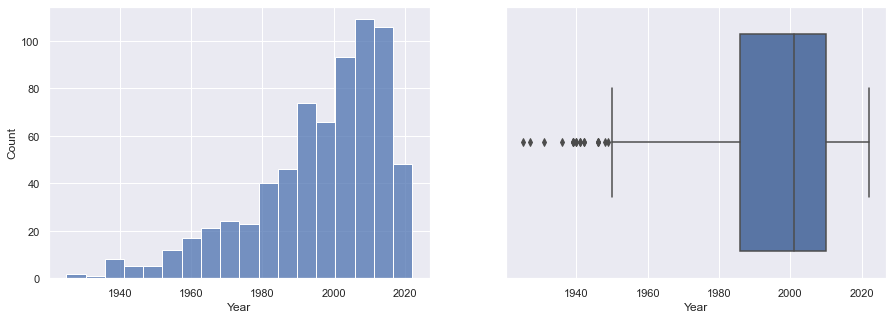

In [ ]:
#Show histogram and boxplot for Year
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='Year')
plt.subplot(1, 2, 2)
sns.boxplot(data, x='Year')

We can see from the histogram that most of the movies in our dataset were produced between 1985 to 2020. The boxplot tells us that the median for movie years is 2001, and movies from the year 1984 to the year 2008 made up the middle 50% of the dataset.

### InflatedBoxOffice

<AxesSubplot:xlabel='InflatedBoxOffice'>

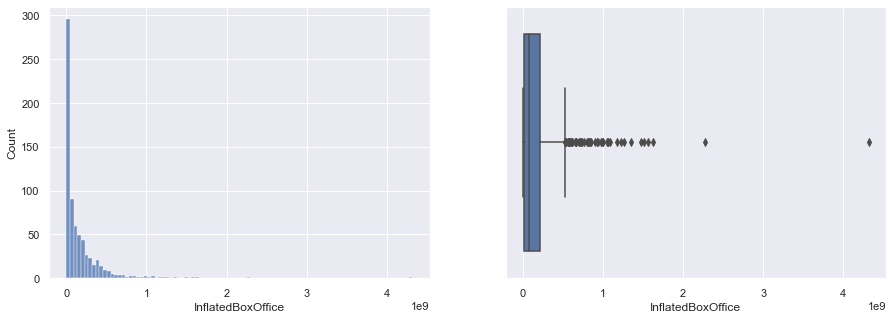

In [ ]:
#Show histogram and boxplot for BoxOffice
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='InflatedBoxOffice')
plt.subplot(1, 2, 2)
sns.boxplot(data, x='InflatedBoxOffice')

We can see from the histogram that the majority of the movies in our dataset generated inflation-adjusted box office of fewer than 0.3 billion dollars. The boxplot confirmed this and tells us that the middle 50% of the movie generates from 0 to 0.2 billion dollars, and the median for box office is 0.08 billion dollars.

### imdbRating

<AxesSubplot:xlabel='imdbRating'>

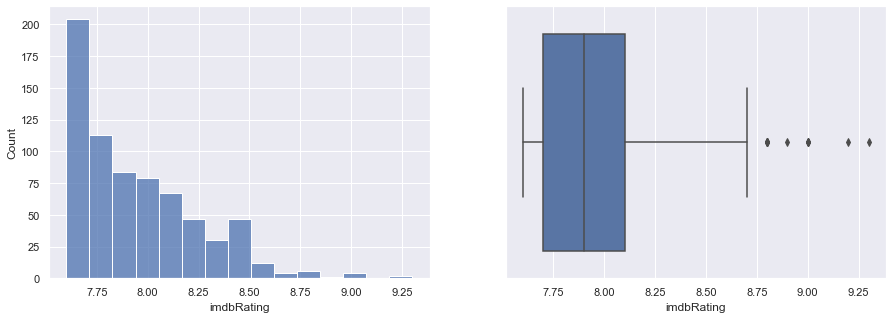

In [ ]:
#Show histogram and boxplot for BoxOffice
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='imdbRating', bins = 15)
plt.subplot(1, 2, 2)
sns.boxplot(data, x='imdbRating')

We can see from the histogram most of our movies' IMDb rating ranges from 7.625 to 8.125, and the boxplot tells us that the middle 50% of movies have an IMDb rating that ranges from  7.70 to 8.10, and the median for IMDb rating is 7.90.

### imdbVotes

<AxesSubplot:xlabel='imdbVotes'>

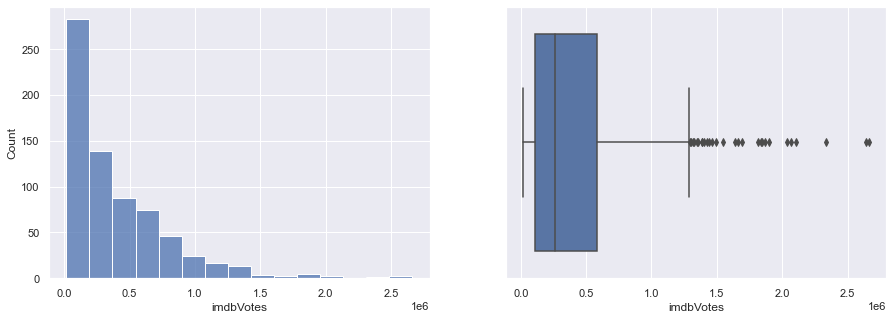

In [ ]:
#Show histogram and boxplot for imdbVotes
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='imdbVotes', bins = 15)
plt.subplot(1, 2, 2)
sns.boxplot(data, x='imdbVotes')

From the histogram, we can see that most of our movies have imdbVotes of less than 0.85 million, and the boxplot tells us that the middle 50% of the movies have an imdbVotes from 0.1 million to 0.57 million, and the median for imdbVotes is 0.3 million.

### Runtime (min)

<AxesSubplot:xlabel='Runtime'>

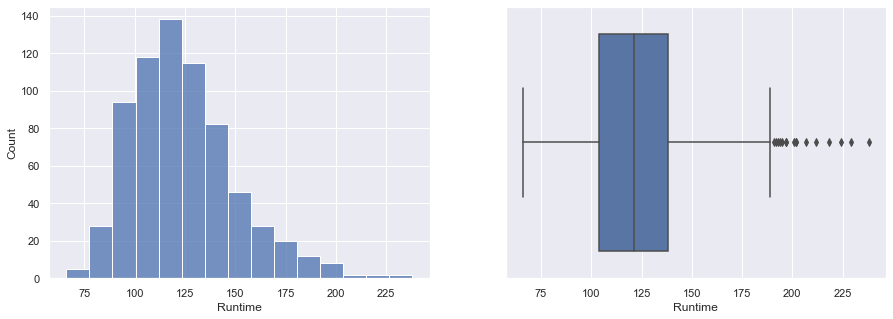

In [ ]:
#Show histogram and boxplot for Runtime
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='Runtime', bins = 15)
plt.subplot(1, 2, 2)
sns.boxplot(data, x='Runtime')

From the histogram, we can see that most of our movies have a runtime ranging from 80 to 155 minutes, and the boxplot tells us that the middle 50% of the movies have a runtime from 105 to 135 minutes, and the median runtime is 120 minutes.

### Rotten Tomatoes

<AxesSubplot:xlabel='RottenTomatoes'>

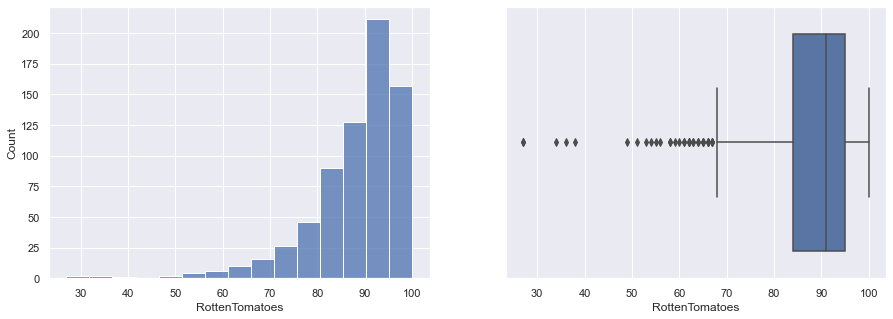

In [ ]:
#Show histogram and boxplot for Runtime
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='RottenTomatoes', bins = 15)
plt.subplot(1, 2, 2)
sns.boxplot(data, x='RottenTomatoes')

From the histogram, we can see that most of the movies in our dataset have a RottenTomatoes score of 76 to 100, and the boxplot tells us that the middle 50% of the movies in our dataset have a RottenTomatoes score from 84 to 96, and the median for RottenTomatoes is 91.

### Metascore

<AxesSubplot:xlabel='Metascore'>

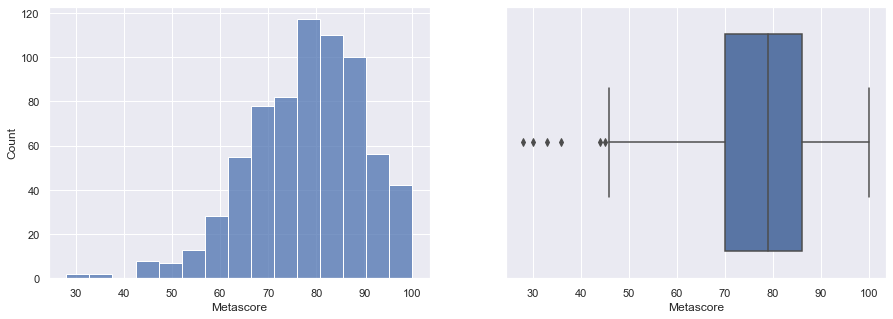

In [ ]:
#Show histogram and boxplot for Runtime
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data, x='Metascore', bins = 15)
plt.subplot(1, 2, 2)
sns.boxplot(data, x='Metascore')

From the histogram, we can see that most of the movies in our dataset have a Metascore that ranges from 61 to 95, and the boxplot tells us that the middle 50% of the movies has a Metascore of 70 to 87, and the median for Metascore is 79.

### Rated

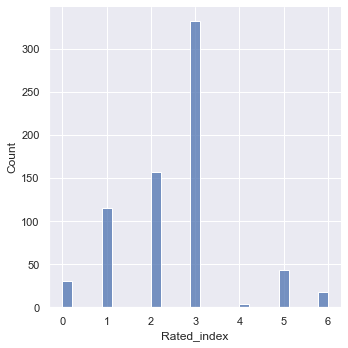

In [ ]:
# Show distribution plot for Rated_index
sns.displot(data, x='Rated_index')

We can see from the distribution here that most movies have a rated_index of 1 - 4, which means parental guidance on different levels. Then followed by 5 which means movies that didn't get sent for a rating and were marked not rated/unrated, then followed by 0 which means that it's good for everyone. Then followed by 6 which consists of old movies produced when there is no mature rating system in place yet. And the last is 4, which means NC-17/X, and it's strictly for adults.

### Language Count

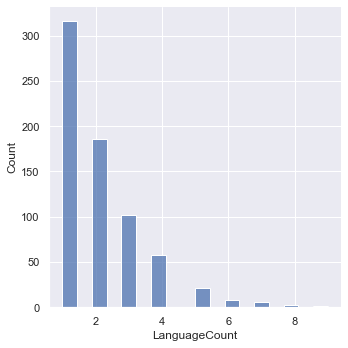

In [ ]:
# Show distribution plot for LanguageCount
sns.displot(data, x='LanguageCount')

As we can see from the distribution plot here, most of the movies have less than three languages when launched, and most movies were having only one language at launch.

### Genre Dummies

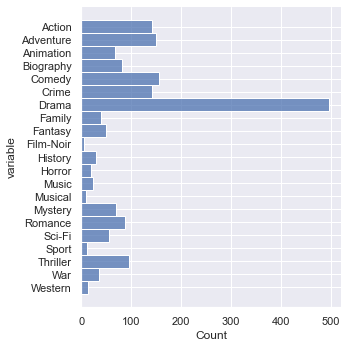

In [ ]:
# Show distribution plot for genre
sns.displot(data[data.columns[11:]].melt().query('value == 1'), y='variable')

As we can see from the histogram here, drama is the most frequently seen genre in our dataset with nearly 500 appearances, following it are action, adventure, comedy, and crime; each with around 150 appearances. The rest of the genres all made less than 100 appearances, with film noir, musical, sport, and western having the least appearance.

## Relations of Ratings and Boxoffice and Other Variables

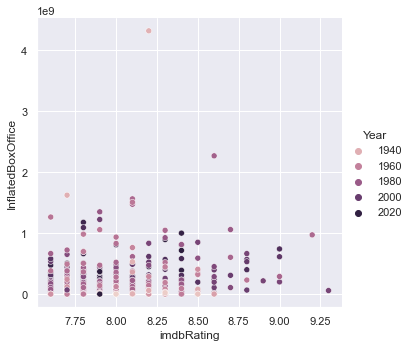

In [ ]:
# Show relationship plot between inflatedboxoffice, imdbrating, and year
sns.relplot(data=data, hue='Year', y='InflatedBoxOffice', x='imdbRating')

As we can see that the situation did get better and now we are seeing more light color dots on the upper part of the graph, but there are still more light color dots towards the bottom of the graph. I think this is understandable since the film industry grew over time and even with inflation-adjusted, more recent movies might still be more commercially successful.

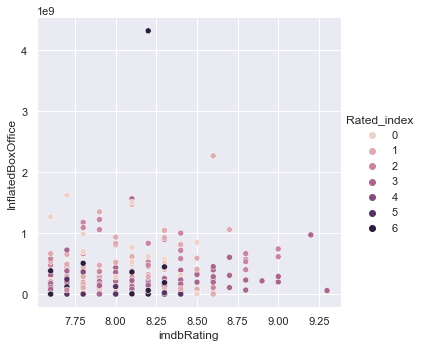

In [ ]:
# Show relationship plot between inflatedboxoffice, imdbrating, and rated
sns.relplot(data=data, hue='Rated_index', y='InflatedBoxOffice', x='imdbRating')

This graph also looks better now, we can see that most highly rated movies needs are 2 - 4, which means they need some parental substantial parental guidance, and dark dots mostly appear in the bottom left corners, meaning most of the movies that are either not rated/unrated or approved/passed are not too successful in both aspects (compared to movies in this sample).

### Prepped Data Review Conclusions

So to conclude there's no dramatic difference in the distribution of our numeric attributes, we have a much cleaner rated distribution now, and the effect of inflation has been reduced. We also noticed that most movies that have a rated index of 5 or 6 are not too outstanding.

# 7. Investigative Analysis & Result

### Create Indicators

Give indicators to the top 250 rated movies and the top 250 box office movies

In [ ]:
#Start on the original data and create two new columns 'top_rated' and 'top_boxoffice' with default values of 0
data250 = data.copy()
data250['top_rated'] = 0
data250['top_boxoffice'] = 0
#Sort through the imdbRating column and InlatedBoxOffice column for first 250 rows and assign our new columns values of 1
data250 = data250.sort_values('imdbRating', ascending=False, ignore_index=True)
data250.loc[:250, 'top_rated'] = 1
data250 = data250.sort_values('InflatedBoxOffice', ascending=False, ignore_index=True)
data250.loc[:250, 'top_boxoffice'] = 1
#Show new dataframe
data250

,Title,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,top_rated,top_boxoffice
0,Gone with the Wind,1939.0,238.0,97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,4.319576e+09,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
1,Star Wars: Episode IV - A New Hope,1977.0,121.0,90.0,8.6,1359272.0,460998507.0,93.0,1.0,1.0,2.268547e+09,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Fantasia,1940.0,125.0,96.0,7.7,97231.0,76408097.0,95.0,1.0,0.0,1.623329e+09,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,The Exorcist,1973.0,122.0,81.0,8.1,408063.0,233005644.0,84.0,7.0,3.0,1.562768e+09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,The Sound of Music,1965.0,172.0,63.0,8.1,234681.0,159287539.0,83.0,2.0,0.0,1.507073e+09,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,The Boondock Saints,1999.0,108.0,44.0,7.7,240292.0,30471.0,27.0,5.0,3.0,5.451897e+04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
696,Elite Squad,2007.0,115.0,33.0,8.0,104699.0,8744.0,51.0,8.0,3.0,1.257039e+04,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697,Mr. Nobody,2009.0,141.0,63.0,7.8,233735.0,3622.0,68.0,2.0,3.0,5.031659e+03,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
698,Jules and Jim,1962.0,105.0,97.0,7.7,41933.0,509.0,94.0,3.0,5.0,5.016478e+03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Genre Analysis

Based on the new indicators we created, I would like to perform an analysis of the difference in the distribution of genres among 'top_rated' movies and 'top_boxoffice' movies.

In [ ]:
# First melt the new dataset and set 'top_rated' and 'top_boxoffice' as id vars
data_melt_genre = data250[data250.columns[11:]].melt(id_vars=['top_rated', 'top_boxoffice'])
# Filter out those with occurance
data_melt_genre = data_melt_genre.query('value== 1')
# Drop the value column and rename the variable column
data_melt_genre = data_melt_genre.drop('value', axis=1).rename(columns={'variable': 'genre'})
data_melt_genre

,top_rated,top_boxoffice,genre
1,1,1,Action
9,0,1,Action
10,0,1,Action
11,1,1,Action
14,1,1,Action
...,...,...,...
14254,0,0,Western
14264,1,0,Western
14367,1,0,Western
14406,1,0,Western


In [ ]:
# Perform another melt, this time set genre as id vars and filter out those with occurace
melt_complete = data_melt_genre.melt(id_vars=['genre']).query('value == 1')
# Result is a melted dataframe with all top_rated and top_boxoffice movies' genres
melt_complete

,genre,variable,value
0,Action,top_rated,1
3,Action,top_rated,1
4,Action,top_rated,1
5,Action,top_rated,1
6,Action,top_rated,1
...,...,...,...
3546,Western,top_boxoffice,1
3547,Western,top_boxoffice,1
3548,Western,top_boxoffice,1
3549,Western,top_boxoffice,1


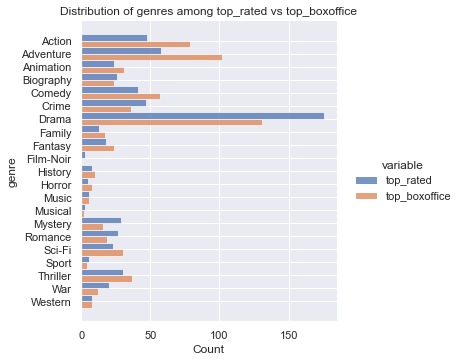

In [ ]:
#Show distribution plot for genres among top_rated vs top_boxoffice
sns.displot(melt_complete, y='genre', hue='variable', multiple='dodge').set(title='Distribution of genres among top_rated vs top_boxoffice')

We can see that there's the most difference between drama and adventure, followed by action, and I think they all showed a significant amount of difference that could link them to whether they could imply a movie being top_rated or top_boxoffice. The other genres also showed differences but they are not that much.

### Rated

In [ ]:
# Melt data250 to use top_rated and top_boxoffice as variables for rated analysis and future analysis
data250_melted = data250.melt(id_vars=data250.columns[:-2]).query('value == 1').drop('value', axis=1)
data250_melted

,Title,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,variable
0,Gone with the Wind,1939.0,238.0,97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,4.319576e+09,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,top_rated
1,Star Wars: Episode IV - A New Hope,1977.0,121.0,90.0,8.6,1359272.0,460998507.0,93.0,1.0,1.0,2.268547e+09,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,top_rated
3,The Exorcist,1973.0,122.0,81.0,8.1,408063.0,233005644.0,84.0,7.0,3.0,1.562768e+09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,top_rated
4,The Sound of Music,1965.0,172.0,63.0,8.1,234681.0,159287539.0,83.0,2.0,0.0,1.507073e+09,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,top_rated
5,Jaws,1975.0,124.0,87.0,8.1,605858.0,265859065.0,97.0,1.0,1.0,1.473856e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,top_rated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Black Swan,2010.0,108.0,79.0,8.0,765510.0,106954678.0,85.0,3.0,3.0,1.461769e+08,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,top_boxoffice
947,Mystic River,2003.0,138.0,84.0,7.9,457345.0,90135191.0,88.0,1.0,3.0,1.460272e+08,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,top_boxoffice
948,First Blood,1982.0,93.0,61.0,7.7,253953.0,47212904.0,86.0,1.0,3.0,1.457888e+08,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,top_boxoffice
949,Stand by Me,1986.0,89.0,75.0,8.1,404216.0,52287414.0,92.0,1.0,3.0,1.421577e+08,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,top_boxoffice


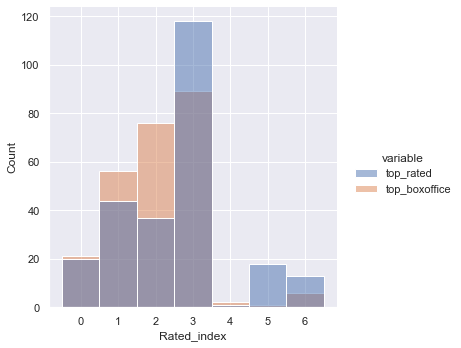

In [ ]:
# Show distribution plot of the rated index with top_rated and top_boxoffice as hue
sns.displot(data250_melted, x='Rated_index', hue='variable', discrete=True)

As we can see here, the top-rated movies have more appearances with rated_index 3, 5, and 6, which are R, TV-MA, movies that were not sent for rating, and old movies that weren't given a rating. Whereas the top box office leads at 1, 2 which are PG, TV-PG, M/PG, GP, PG-13, TV-14, basically anything that needs slight to strong parental guidance. It also leads slightly at 0 and 4, one needs no guidance at all and the other is strictly adult.

### Runtime Analysis

I suspected that runtime for the top box office would be shorter as it is often rare for a movie that's 3 hours long to have great box office performance, but with many top-rated movies where that went into a deep discussion on a certain topic, it could easily take 180 minutes.

My analysis for the following several numeric variables follows a similar pattern, so I created a target parameter that would help me generate the desired statistics and plots easier

top rated 250 Runtime average: 130.88446215139442
top boxoffice 250 Runtime average: 130.0597609561753


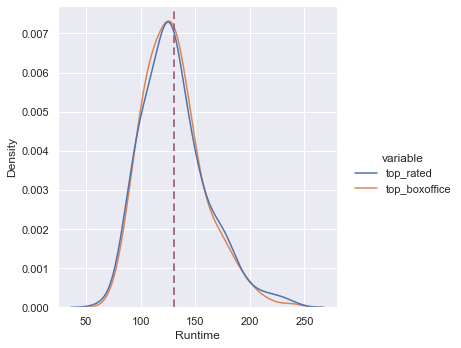

In [ ]:
# Create target parameter and set it to Runtime
target = 'Runtime'
# Show distribution plot in kde form and top_rated and 
sns.displot(data250_melted, x=target, hue='variable', kind='kde')
# Use an axvline to draw a vertical line on top of our kde plot so that it clearly shows both variables' mean
plt.axvline(data250_melted.query('variable=="top_rated"')[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
plt.axvline(data250_melted.query('variable=="top_boxoffice"')[target].mean(), color='r', alpha=0.8, dashes=[5, 3])
# Print out the mean statistics for both top_rated and top_boxoffice
print(f'top rated 250 {target} average:', data250_melted.query('variable=="top_rated"')[target].mean())
print(f'top boxoffice 250 {target} average:', data250_melted.query('variable=="top_boxoffice"')[target].mean())

Unfortunately, we couldn't see any difference here, and my assumption was completely wrong. Both the KDE line and the vertical mean line are almost exactly on top of each other, and the statistics tell us that the means only have a difference of less than 0.8247, so in terms of characteristics of runtime between top-rated movies and top box office movies, they are almost the same.

### Year

My assumption for the year is that top box office movies would likely be 'younger' than top-rated movies since the film industry grew more and more mature over time. And we have seen a similar trend in EDA as well.

top rated 250 Year average: 1989.1235059760957
top boxoffice 250 Year average: 1995.1633466135459


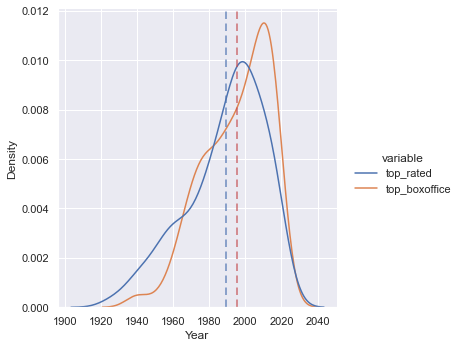

In [ ]:
# Do the same thing here as Runtime, with target replaced to Year
target = 'Year'
sns.displot(data250_melted, x=target, hue='variable', kind='kde')
plt.axvline(data250_melted.query('variable=="top_rated"')[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
plt.axvline(data250_melted.query('variable=="top_boxoffice"')[target].mean(), color='r', alpha=0.8, dashes=[5, 3])
print(f'top rated 250 {target} average:', data250_melted.query('variable=="top_rated"')[target].mean())
print(f'top boxoffice 250 {target} average:', data250_melted.query('variable=="top_boxoffice"')[target].mean())

It turns out that my assumption was not wrong, on average top box office movies are about 6 years younger than top-rated movies, and have a higher density in the 21st century.

### imdbVotes

I suspected that the top box office would, in general, have more votes than the top-rated since they are already the top box office, many people went to see them and would leave their reviews.

top rated 250 imdbVotes average: 629221.1952191235
top boxoffice 250 imdbVotes average: 642995.8326693227


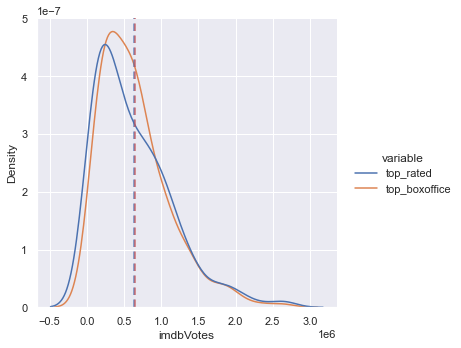

In [ ]:
# Do the same thing here as Runtime, with target replaced to imdbVotes
target = 'imdbVotes'
sns.displot(data250_melted, x=target, hue='variable', kind='kde')
plt.axvline(data250_melted.query('variable=="top_rated"')[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
plt.axvline(data250_melted.query('variable=="top_boxoffice"')[target].mean(), color='r', alpha=0.8, dashes=[5, 3])
print(f'top rated 250 {target} average:', data250_melted.query('variable=="top_rated"')[target].mean())
print(f'top boxoffice 250 {target} average:', data250_melted.query('variable=="top_boxoffice"')[target].mean())

So it turns out my assumption was not wrong, but the difference is pretty small: on average the top box office movies lead on votes by 13000, with average numbers being 629221 and 642995, it does not seem to be very significant. The KDE plot shows some difference when it comes to movies with around 0.6 million votes, but other than that they look pretty similar.

### Language Count

I suspected that top box office movies would have more languages in general

top rated 250 LanguageCount average: 2.0796812749003983
top boxoffice 250 LanguageCount average: 2.103585657370518


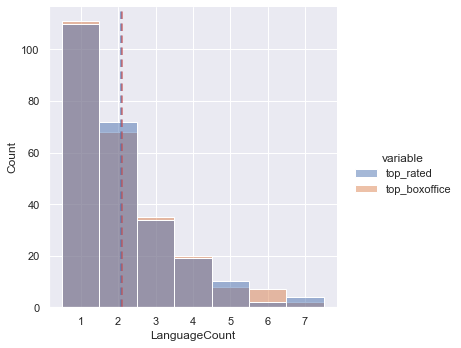

In [ ]:
# Do the same thing here as Runtime, with target replaced to Language Count
target = 'LanguageCount'
sns.displot(data250_melted, x=target, hue='variable', discrete=True)
plt.axvline(data250_melted.query('variable=="top_rated"')[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
plt.axvline(data250_melted.query('variable=="top_boxoffice"')[target].mean(), color='r', alpha=0.8, dashes=[5, 3])
print(f'top rated 250 {target} average:', data250_melted.query('variable=="top_rated"')[target].mean())
print(f'top boxoffice 250 {target} average:', data250_melted.query('variable=="top_boxoffice"')[target].mean())

It turns out that there's no significant difference, their means are very close, and the only time the top box office has significantly more appearance is when it comes to 6 languages.

## Analysis on movies that appeared in both top rated and top box office

In [ ]:
#Filter out movies that appear in both
intersect = data250.query('top_rated == 1 & top_boxoffice == 1')
intersect

,Title,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,top_rated,top_boxoffice
0,Gone with the Wind,1939.0,238.0,97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,4.319576e+09,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
1,Star Wars: Episode IV - A New Hope,1977.0,121.0,90.0,8.6,1359272.0,460998507.0,93.0,1.0,1.0,2.268547e+09,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,The Exorcist,1973.0,122.0,81.0,8.1,408063.0,233005644.0,84.0,7.0,3.0,1.562768e+09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,The Sound of Music,1965.0,172.0,63.0,8.1,234681.0,159287539.0,83.0,2.0,0.0,1.507073e+09,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,Jaws,1975.0,124.0,87.0,8.1,605858.0,265859065.0,97.0,1.0,1.0,1.473856e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Taxi Driver,1976.0,114.0,94.0,8.2,829151.0,28262574.0,96.0,2.0,3.0,1.481176e+08,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
244,Braveheart,1995.0,178.0,68.0,8.4,1035853.0,75609945.0,75.0,5.0,3.0,1.478854e+08,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
245,Groundhog Day,1993.0,101.0,72.0,8.1,630923.0,71107962.0,97.0,3.0,1.0,1.466808e+08,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
249,Stand by Me,1986.0,89.0,75.0,8.1,404216.0,52287414.0,92.0,1.0,3.0,1.421577e+08,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Genre

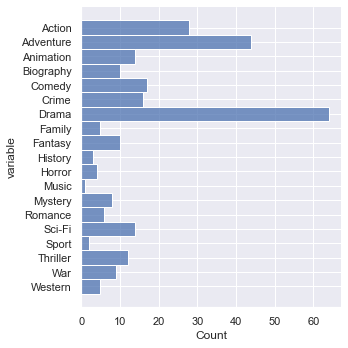

In [ ]:
# Show distribution plot for genre
sns.displot(intersect[intersect.columns[11:-2]].melt().query('value == 1'), y='variable')

The distribution of genres among movies that do well in both aspects is pretty similar to the one we saw in EDA. Drama, Adventure, and Action take the lead.

### Rated

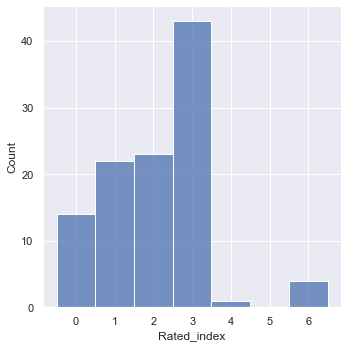

In [ ]:
# Show distribution plot of the rated index
sns.displot(intersect, x='Rated_index', discrete=True)

The rating most seen in the intersection of the movies is 3, which is R/TV - MA(strong parental guidance), followed by 2 and 1(light to moderate parental guidance), and only a few movies in this set were not given a rating or is strictly adult, and in this set, no movie was not sent for a rated review.

### Runtime

intersect of top 250 Runtime average: 138.01869158878506


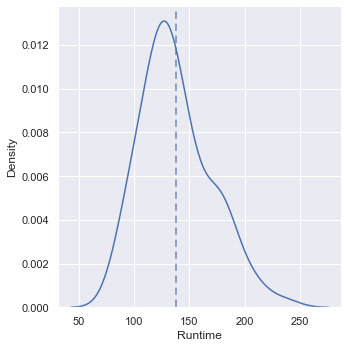

In [ ]:
# Create target parameter and set it to Runtime
target = 'Runtime'
# Show distribution plot in kde form and top_rated and 
sns.displot(intersect, x=target, kind='kde')
# Use an axvline to draw a vertical line on top of our kde plot so that it clearly shows both variables' mean
plt.axvline(intersect[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
# Print out the mean statistics for both top_rated and top_boxoffice
print(f'intersect of top 250 {target} average:', intersect[target].mean())

We can see that on average the runtime for movies that do well in both aspects is about 138 minutes, and the KDE plot shows the highest density at around 125 minutes.

### Year

intersect of top 250 Year average: 1991.2429906542056


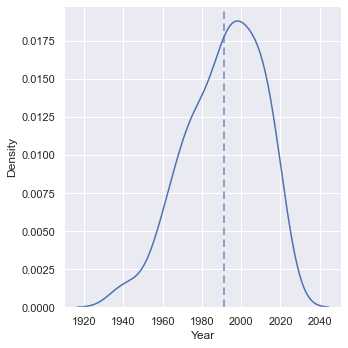

In [ ]:
# Create target parameter and set it to Runtime
target = 'Year'
# Show distribution plot in kde form and top_rated and 
sns.displot(intersect, x=target, kind='kde')
# Use an axvline to draw a vertical line on top of our kde plot so that it clearly shows both variables' mean
plt.axvline(intersect[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
# Print out the mean statistics for both top_rated and top_boxoffice
print(f'intersect of top 250 {target} average:', intersect[target].mean())

The average production year of the movies that do well in both aspects is about 1991, closer to top rated movies year average than to the top box office movies average, but the KDE plot shows the highest density at around 1994, almost the same as the top box office movies average.

### imdbVotes

intersect of top 250 imdbVotes average: 911441.214953271


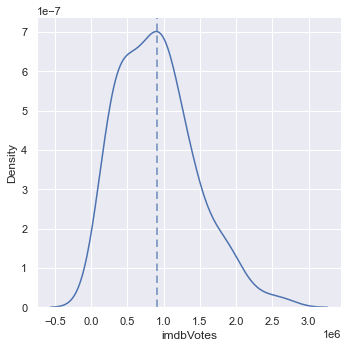

In [ ]:
# Create target parameter and set it to Runtime
target = 'imdbVotes'
# Show distribution plot in kde form and top_rated and 
sns.displot(intersect, x=target, kind='kde')
# Use an axvline to draw a vertical line on top of our kde plot so that it clearly shows both variables' mean
plt.axvline(intersect[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
# Print out the mean statistics for both top_rated and top_boxoffice
print(f'intersect of top 250 {target} average:', intersect[target].mean())

The average imdbVotes of movies that do well in both aspects are about 0.9 million, and the KDE plot also shows the highest density around that point.

### Language Count

intersect of top 250 LanguageCount average: 2.130841121495327


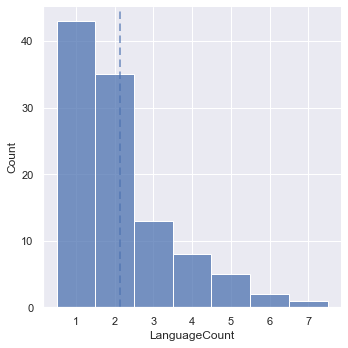

In [ ]:
# Do the same thing here as Runtime, with target replaced to Language Count
target = 'LanguageCount'
sns.displot(intersect, x=target, discrete=True)
plt.axvline(intersect[target].mean(), color='b', alpha=0.8, dashes=[5, 3])
print(f'intersect of top 250 {target} average:', intersect[target].mean())

Most of the movies that do well in both aspects were released in 1 - 2 languages.

### Conclusions Graph Analysis

From the graphs above, we can see that top box office movies have a significantly more amount of action and adventure appearance while having a significantly less amount of drama appearance. There's no particular difference in runtime, imdbvotes, and language count of the movies that are top rated and top box office. However, more recent movies do seem to do slightly better commercially even after considering inflation, which could be explained by the film industry's growth. 

## Clustering Analysis

I would also like to perform a cluster analysis to see if any clusters contain movies that do well in both aspects. If there exists such a cluster, we could look into it and see if we can find some characteristics of the movies using our domain knowledge

In [ ]:
#Import Packages for clustering analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Use everything other than title and genre
X = data[data.columns[1:11]]
X

,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice
0,1994.0,142.0,81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,5.786054e+07
1,1972.0,175.0,100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,9.716467e+08
2,2008.0,152.0,84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,7.405908e+08
3,2003.0,201.0,94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,6.128015e+08
4,1993.0,195.0,94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,1.998820e+08
...,...,...,...,...,...,...,...,...,...,...
989,1968.0,105.0,86.0,7.6,35324.0,44527234.0,98.0,1.0,6.0,3.816005e+08
990,1967.0,78.0,65.0,7.6,184191.0,141843612.0,88.0,1.0,0.0,1.264475e+09
993,1960.0,90.0,90.0,7.6,32225.0,58565.0,96.0,1.0,5.0,5.903086e+05
994,1955.0,111.0,89.0,7.6,91492.0,212780.0,93.0,1.0,2.0,2.366594e+06


In [ ]:
#Create empty list to store score information
kmeans_scores = []
#For loop to loop through k means from 2 to 10
for k in range(2, 11):
    KM = KMeans(n_clusters=k, max_iter=1000)
    KM.fit(X)
    labels = KM.labels_
    #Use silhouetter score to evaluate k and append metrics to kmeans_score list
    kmeans_scores.append(silhouette_score(X, labels))

#Convert kmeans_scores to dataframe and print out result
kscores = pd.DataFrame({'k': range(2, 11), 'score': kmeans_scores})
kscores

,k,score
0,2,0.765906
1,3,0.690744
2,4,0.663351
3,5,0.605811
4,6,0.607472
5,7,0.602165
6,8,0.583558
7,9,0.583838
8,10,0.578294


[Text(0.5, 1.0, 'Performance of k ranging from 2 - 10')]

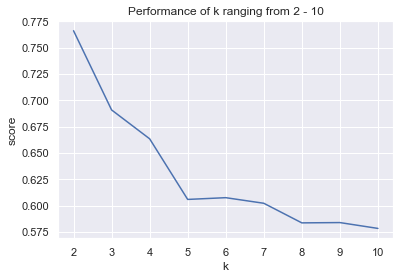

In [ ]:
#Show line plot for values of k from 2 - 10
sns.lineplot(data = kscores, x='k', y='score').set(title='Performance of k ranging from 2 - 10')

Even though k = 2 has the highest score, with only 2 clusters we couldn't really see any difference. Since 3 and 4 clusters are also quite limited, I picked k = 6 as our cluster number.

In [ ]:
#Set cluster number = 6
KM = KMeans(n_clusters=6, random_state = 0, max_iter=1000)
#Fit X
KM.fit(X)
#Create a new dataframe based on X and create new columns of cluster labels and movie titles
cluster_result = X.copy()
cluster_result['label'] = KM.labels_
cluster_result['Title'] = data[['Title']]
#Print out new dataframe
cluster_result

,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,label,Title
0,1994.0,142.0,81.0,9.3,2662343.0,28767189.0,91.0,1.0,3.0,5.786054e+07,0,The Shawshank Redemption
1,1972.0,175.0,100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,9.716467e+08,1,The Godfather
2,2008.0,152.0,84.0,9.0,2638780.0,534987076.0,94.0,2.0,2.0,7.405908e+08,1,The Dark Knight
3,2003.0,201.0,94.0,9.0,1837587.0,378251207.0,93.0,4.0,2.0,6.128015e+08,3,The Lord of the Rings: The Return of the King
4,1993.0,195.0,94.0,9.0,1349692.0,96898818.0,98.0,5.0,3.0,1.998820e+08,4,Schindler's List
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1968.0,105.0,86.0,7.6,35324.0,44527234.0,98.0,1.0,6.0,3.816005e+08,4,The Odd Couple
990,1967.0,78.0,65.0,7.6,184191.0,141843612.0,88.0,1.0,0.0,1.264475e+09,2,The Jungle Book
993,1960.0,90.0,90.0,7.6,32225.0,58565.0,96.0,1.0,5.0,5.903086e+05,0,Eyes Without a Face
994,1955.0,111.0,89.0,7.6,91492.0,212780.0,93.0,1.0,2.0,2.366594e+06,0,Rebel Without a Cause


In [ ]:
# Put all our centers into a dataframe
cluster_centers = pd.DataFrame(KM.cluster_centers_, columns=X.columns)
cluster_centers

,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice
0,1995.791080,120.030516,78.267606,7.925822,256580.671362,1.732726e+07,88.394366,2.037559,2.779343,3.304538e+07
1,1994.190476,141.476190,77.190476,8.242857,932128.285714,4.538945e+08,90.571429,2.380952,1.571429,9.252015e+08
2,1968.428571,122.428571,81.857143,8.014286,471360.428571,2.535062e+08,91.285714,2.000000,0.857143,1.578557e+09
3,1997.364865,129.310811,79.189189,8.024324,733243.932432,2.472061e+08,89.324324,2.175676,1.675676,4.736709e+08
4,1997.309942,129.274854,76.157895,7.960234,553805.192982,1.115851e+08,86.649123,2.058480,2.403509,2.118229e+08
5,1939.000000,238.000000,97.000000,8.200000,316175.000000,2.008822e+08,90.000000,1.000000,6.000000,4.319576e+09


What our cluster looks like, using cluster 0 as example

In [ ]:
#Create a target_cluster that I could call later, set it to 0 for now
target_cluster = 0
#Print out the number of movies in the cluster
print(len(cluster_result[cluster_result['label'] == target_cluster]))
#Print out cluster center details
print(f'cluster #{target_cluster} center: ')
display(cluster_centers.loc[[target_cluster]])
#Print out 20 sample movies from the cluster, if not j
print(f'\nrandom samples of cluster #{target_cluster}: ')
cluster_result[cluster_result['label'] == target_cluster].sample(n=min(len(cluster_result[cluster_result['label'] == target_cluster]), 20))

426
cluster #0 center: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice
0,1995.79108,120.030516,78.267606,7.925822,256580.671362,1.732726e+07,88.394366,2.037559,2.779343,3.304538e+07



random samples of cluster #0: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,label,Title
694,1991.0,112.0,76.0,7.8,141670.0,57504069.0,96.0,1.0,3.0,1.258633e+08,0,Boyz n the Hood
113,2001.0,122.0,69.0,8.3,756208.0,33225499.0,89.0,3.0,3.0,5.592223e+07,0,Amélie
794,2007.0,122.0,85.0,7.7,32395.0,742349.0,90.0,3.0,5.0,1.067202e+06,0,The Edge of Heaven
118,1992.0,99.0,79.0,8.3,1015052.0,2832029.0,89.0,1.0,3.0,6.016790e+06,0,Reservoir Dogs
652,2007.0,123.0,85.0,7.8,279604.0,50927067.0,83.0,2.0,3.0,7.321282e+07,0,Atonement
765,2015.0,105.0,74.0,7.7,132529.0,6758416.0,81.0,1.0,2.0,8.497116e+06,0,Me and Earl and the Dying Girl
807,2006.0,145.0,71.0,7.7,77282.0,4398532.0,76.0,4.0,3.0,6.502496e+06,0,Black Book
878,1986.0,120.0,76.0,7.7,200336.0,8551228.0,95.0,1.0,3.0,2.324886e+07,0,Blue Velvet
523,2006.0,109.0,84.0,7.9,501608.0,35552383.0,92.0,9.0,3.0,5.255827e+07,0,Children of Men
948,2007.0,114.0,72.0,7.6,272853.0,20292962.0,95.0,1.0,3.0,2.917319e+07,0,Gone Baby Gone


Even though we have all our cluster centers listed here, is still hard to tell which one is useful to us, so I thought about making radar chart and found this guide online: https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart Below are radar charts I made for our clusters here following this guide

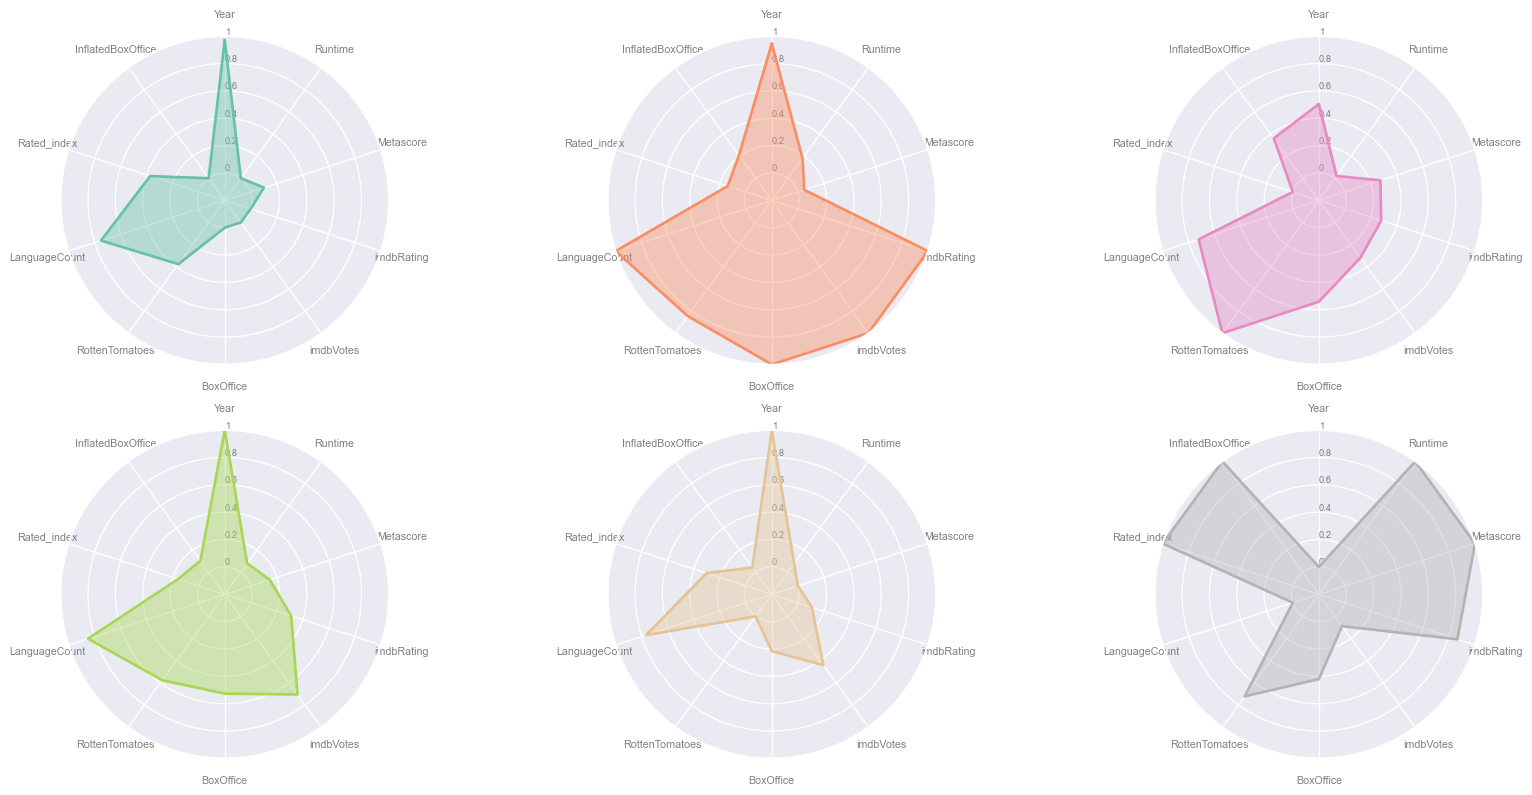

In [ ]:
from math import pi
 
def make_spider(index, row, title, color, head):
    categories=head
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(4,3,index+1, polar=True, )

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0', "0.2","0.4","0.6", '0.8', '1'], color="grey", size=7)
    plt.ylim(-0.2, 1)

    values=row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)


my_dpi=96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
#my_palette = plt.cm.get_cmap("Set2", len())
 

centers = pd.DataFrame(KM.cluster_centers_, columns=X.columns)
#Normalizing my centers for visualization
centers = (centers - centers.min()) / (centers.max() - centers.min())
my_palette = plt.cm.get_cmap("Set2", len(centers))

for key, row in centers.iterrows():
    make_spider(index=key, row=row, title='cluster '+ str(key), color=my_palette(key), head=X.columns)

We can see from our clusters here that cluster 1 and 5 have the potential to help us find common characteristics for movies that are both well-received and commercially successful, even though movies in cluster 6 do not score the highest in InflatedBoxOffice. So we pick them out and see if they could bring us any insights.

In [ ]:
#Set target cluster = 1
target_cluster = 1
#Print out the number of movies in the cluster
print(len(cluster_result[cluster_result['label'] == target_cluster]))
#Print out cluster center details
print(f'cluster #{target_cluster} center: ')
display(cluster_centers.loc[[target_cluster]])
#Print out 20 sample movies from the cluster, if not j
print(f'\nrandom samples of cluster #{target_cluster}: ')
cluster_result[cluster_result['label'] == target_cluster].sample(n=min(len(cluster_result[cluster_result['label'] == target_cluster]), 20))

21
cluster #1 center: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice
1,1994.190476,141.47619,77.190476,8.242857,932128.285714,4.538945e+08,90.571429,2.380952,1.571429,9.252015e+08



random samples of cluster #1: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,label,Title
435,1969.0,110.0,66.0,8.0,216807.0,102308889.0,89.0,2.0,1.0,8.306452e+08,1,Butch Cassidy and the Sundance Kid
608,2016.0,133.0,65.0,7.8,635843.0,533539991.0,84.0,1.0,2.0,6.625831e+08,1,Rogue One: A Star Wars Story
564,1965.0,197.0,69.0,7.9,77270.0,111721910.0,84.0,3.0,2.0,1.057038e+09,1,Doctor Zhivago
1,1972.0,175.0,100.0,9.2,1847150.0,136381073.0,97.0,3.0,3.0,9.716467e+08,1,The Godfather
180,1993.0,127.0,68.0,8.2,985724.0,404214720.0,92.0,2.0,2.0,8.338104e+08,1,Jurassic Park
49,1994.0,88.0,88.0,8.5,1052735.0,422783777.0,93.0,4.0,0.0,8.503610e+08,1,The Lion King
122,1983.0,131.0,58.0,8.3,1050753.0,309306177.0,83.0,6.0,1.0,9.253106e+08,1,Star Wars: Episode VI - Return of the Jedi
655,2009.0,162.0,83.0,7.8,1247508.0,785221649.0,82.0,2.0,2.0,1.090825e+09,1,Avatar
616,2015.0,138.0,80.0,7.8,929335.0,936662225.0,93.0,1.0,2.0,1.177632e+09,1,Star Wars: Episode VII - The Force Awakens
72,2022.0,130.0,78.0,8.4,435970.0,716498761.0,96.0,1.0,2.0,7.164988e+08,1,Top Gun: Maverick


In [ ]:
#Set target cluster = 5
target_cluster = 5
#Print out the number of movies in the cluster
print(len(cluster_result[cluster_result['label'] == target_cluster]))
#Print out cluster center details
print(f'cluster #{target_cluster} center: ')
display(cluster_centers.loc[[target_cluster]])
#Print out 20 sample movies from the cluster, if not j
print(f'\nrandom samples of cluster #{target_cluster}: ')
cluster_result[cluster_result['label'] == target_cluster].sample(n=min(len(cluster_result[cluster_result['label'] == target_cluster]), 20))

1
cluster #5 center: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice
5,1939.0,238.0,97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,4.319576e+09



random samples of cluster #5: 


,Year,Runtime,Metascore,imdbRating,imdbVotes,BoxOffice,RottenTomatoes,LanguageCount,Rated_index,InflatedBoxOffice,label,Title
206,1939.0,238.0,97.0,8.2,316175.0,200882193.0,90.0,1.0,6.0,4.319576e+09,5,Gone with the Wind


### Conclusion Cluster Analysis

Unfortunately, cluster 5 only has one movie in it and that is 'Gone with the wind', with its famous length and box office performance it shouldn't be a surprise to many people, but I still find it very fascinating that it could take up an entire cluster all by itself. And even though cluster 1 contains a lot of big IP movies, there are still movies that are independent like 'The Graduate'and 'Doctor Zhivago'. But overall, I think it's still safe to say that big IP movies tend to perform better both rating-wise and commercial-wise.

## Predictive Model

In the last part of my investigative analysis, I'll try to build predictive models that could classify all movies in the dataset to whether they are a part of the top 250 rated movies or a part of the top 250 box office. Then, from the models and feature importance that I derive, I could get a sense of what matters most(in this sample of movies) to a movie being top-rated or top-selling.

In [ ]:
#Import selectkbest, f_classif, logistic regression, train_test_split, and model evaluation metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, recall_score, f1_score

In [ ]:
# Speicy predictors and responses
X = data250.drop(['top_rated', 'top_boxoffice', 'imdbRating', 'Title', 'RottenTomatoes', 'Metascore'], axis=1)
y = data250['top_rated']
X1 = data250.drop(['top_rated', 'top_boxoffice', 'BoxOffice', 'InflatedBoxOffice', 'Title'], axis=1)
y1 = data250['top_boxoffice']

In [ ]:
#Create a new pandas dataframe called all k metrics to score our evaluations
allkmetrics = pd.DataFrame(columns = ['#pred','mse','recall','f1','accuracy'])
allkmetrics
#Create a new pandas dataframe called all k metrics to score our evaluations
allkmetrics1 = pd.DataFrame(columns = ['#pred','mse','recall','f1','accuracy'])
allkmetrics1

,#pred,mse,recall,f1,accuracy


In [ ]:
#Define a function to run the selectkbest method, and get the model accuracy, mse, recall, f1 score, and model attributes accordingly
def getkbest1 (k):
    #Specify attributes and response first
    X1 = data250.drop(['top_rated', 'top_boxoffice', 'BoxOffice', 'InflatedBoxOffice', 'Title'], axis=1)
    y1 = data250['top_boxoffice']   
    
    #Introduce SelectKBest
    selector = SelectKBest(f_classif, k=k)
    X1_fit = selector.fit_transform(X1, y1)
    
    #Apply train test split, and then fit (X, y) to logistic regression model
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1_fit, y1, random_state=0)
    model = LogisticRegression()
    model.fit(X1_train, y1_train)
    
    #Calculate model metrics
    y1_pred = model.predict(X1_test)
    mse = mean_squared_error(y1_test, y1_pred)
    recall = recall_score(y1_test, y1_pred)
    f1 = f1_score(y1_test, y1_pred)
    accuracy = model.score(X1_test,y1_test)
    
    #Print out model attributes given k best attributes
    print([X1.columns[i] for i in selector.get_support(indices = True)])
    
    #Return number of k and its corresponding model attributes
    return k, mse, recall, f1, accuracy

In [ ]:
#Define a function to run the selectkbest method, and get the model accuracy, r2, mse, recall, f1 score, and model attributes accordingly
def getkbest (k):
    #Specify attributes and response first
    X = data250.drop(['top_rated', 'top_boxoffice', 'imdbRating', 'Title', 'RottenTomatoes', 'Metascore'], axis=1)
    y = data250['top_rated']
    
    #Introduce SelectKBest
    selector = SelectKBest(f_classif, k=k)
    X_fit = selector.fit_transform(X, y)
    
    #Apply train test split, and then fit (X, y) to logistic regression model
    X_train, X_test, y_train, y_test = train_test_split(X_fit, y, random_state=0)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    #Calculate model metrics
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = model.score(X_test,y_test)
    
    #Print out model attributes given k best attributes
    print([X.columns[i] for i in selector.get_support(indices = True)])
    
    #Return number of k and its corresponding model attributes
    return k, mse, recall, f1, accuracy

In [ ]:
#Use for loop to get result for k from 1 - 30
for k in range(1,29):
        allkmetrics.loc[k] = getkbest(k)
        
#Print out dataframe to see results for predicting top rated movies
allkmetrics

['imdbVotes']
['Year', 'imdbVotes']
['Year', 'Runtime', 'imdbVotes']
['Year', 'Runtime', 'imdbVotes', 'InflatedBoxOffice']
['Year', 'Runtime', 'imdbVotes', 'InflatedBoxOffice', 'Comedy']
['Year', 'Runtime', 'imdbVotes', 'InflatedBoxOffice', 'Comedy', 'War']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'War']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'War', 'Western']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'Sport', 'War', 'Western']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'Film-Noir', 'Sport', 'War', 'Western']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'Film-Noir', 'Mystery', 'Sport', 'War', 'Western']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy', 'Film-Noir', 'Mystery', 'Romance', 'Sport', 'War', 'Western']
['Year', 'Runtime', 'imdbVotes', 'BoxOffice', 'InflatedBoxOffice', 'Comedy'

,#pred,mse,recall,f1,accuracy
1,1.0,0.611429,1.000000,0.559671,0.388571
2,2.0,0.240000,0.500000,0.618182,0.760000
3,3.0,0.240000,0.500000,0.618182,0.760000
4,4.0,0.577143,0.808824,0.521327,0.422857
5,5.0,0.577143,0.808824,0.521327,0.422857
6,6.0,0.577143,0.808824,0.521327,0.422857
7,7.0,0.474286,0.838235,0.578680,0.525714
8,8.0,0.474286,0.838235,0.578680,0.525714
9,9.0,0.474286,0.838235,0.578680,0.525714
10,10.0,0.474286,0.838235,0.578680,0.525714


We can see that our best model here is the model with two attributes 'Year' and 'imdbVotes'.

In [ ]:
#Use for loop to get result for k from 1 - 5
for k in range(1,30):
        allkmetrics1.loc[k] = getkbest1(k)
        
#Print out dataframe to see result for predicting top boxoffice movies
allkmetrics1

['imdbVotes']
['imdbVotes', 'Adventure']
['imdbVotes', 'Adventure', 'Drama']
['imdbVotes', 'Rated_index', 'Adventure', 'Drama']
['imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Drama']
['Runtime', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Drama']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Drama']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Drama', 'Romance']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Drama', 'Romance', 'Sci-Fi']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Crime', 'Drama', 'Romance', 'Sci-Fi']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Crime', 'Drama', 'Mystery', 'Romance', 'Sci-Fi']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adventure', 'Crime', 'Drama', 'Mystery', 'Romance', 'Sci-Fi', 'Western']
['Runtime', 'imdbRating', 'imdbVotes', 'Rated_index', 'Action', 'Adv

,#pred,mse,recall,f1,accuracy
1,1.0,0.657143,1.000000,0.510638,0.342857
2,2.0,0.657143,1.000000,0.510638,0.342857
3,3.0,0.657143,1.000000,0.510638,0.342857
4,4.0,0.234286,0.583333,0.630631,0.765714
5,5.0,0.217143,0.633333,0.666667,0.782857
6,6.0,0.262857,0.500000,0.566038,0.737143
7,7.0,0.262857,0.500000,0.566038,0.737143
8,8.0,0.262857,0.500000,0.566038,0.737143
9,9.0,0.262857,0.500000,0.566038,0.737143
10,10.0,0.262857,0.500000,0.566038,0.737143


We can see that our best model here is the model with five attributes: 'imdbVotes', 'Rated_index', 'Action', 'Adventure', and 'Drama'.

### Null Error Rate

In [ ]:
1 - ((data250.top_rated.values.sum()) / (data250.shape[0]))

0.6414285714285715

In [ ]:
1 - ((data250.top_boxoffice.values.sum()) / (data250.shape[0]))

0.6414285714285715

Both of our best models pass the null error rate check

### Conclusion Predictive Models

The best model that we found for predicting top-rated movies contains only two attributes and does not seem to look too helpful, on the other hand, the best model that we found for predicting top box office movies is quite good, it contains 5 attributes of which 3 of them are directly related to genre and the movie rating system.

# 8. Conclusion

So in conclusion, I found out that there’s no particular difference in runtime, imdbvotes, and language count of the movies that are top rated and top box office. However, more recent movies do seem to do slightly better commercially even after considering inflation, I think this is understandable since the film industry grew over time. And our genre analysis revealed that top box office movies have a significantly more amount of action and adventure appearance while having a significantly less amount of drama appearance. My cluster analysis revealed that there is a group that does relatively better than other groups on both IMDb ratings and box office and its consists of mainly big IP movies. My predictive models confirmed that there is a connection between the classification of top-rated and top box office movies and the three genres that showed the most difference.

To conclude, I think I answered part of my research question as I found out about some of the similarities and differences between the top reviewed movies and top box office movies, I discovered that more recent movies are slightly more successful, and 'action', 'adventure', and 'drama' are the genres that differentiate them the most. And for some common characteristics of a movie that's both well-received and commercially successful one of my clusters revealed that big IP movies and their sequels are more likely to do well in both. And when combined with 'imdbVotes' and  'Rated_index', 'Action', 'Adventure', and 'Drama' are three genres that could help us classify a top box office movie.

For future extensions on my work, I think I could find some other samples that may focus on a decade of movies and perform the analysis I did here to get more detailed insights on movies relative to a particular time period. 